<a href="https://colab.research.google.com/github/nhbbobb1985/aztec/blob/main/fomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

生成象限分析图...


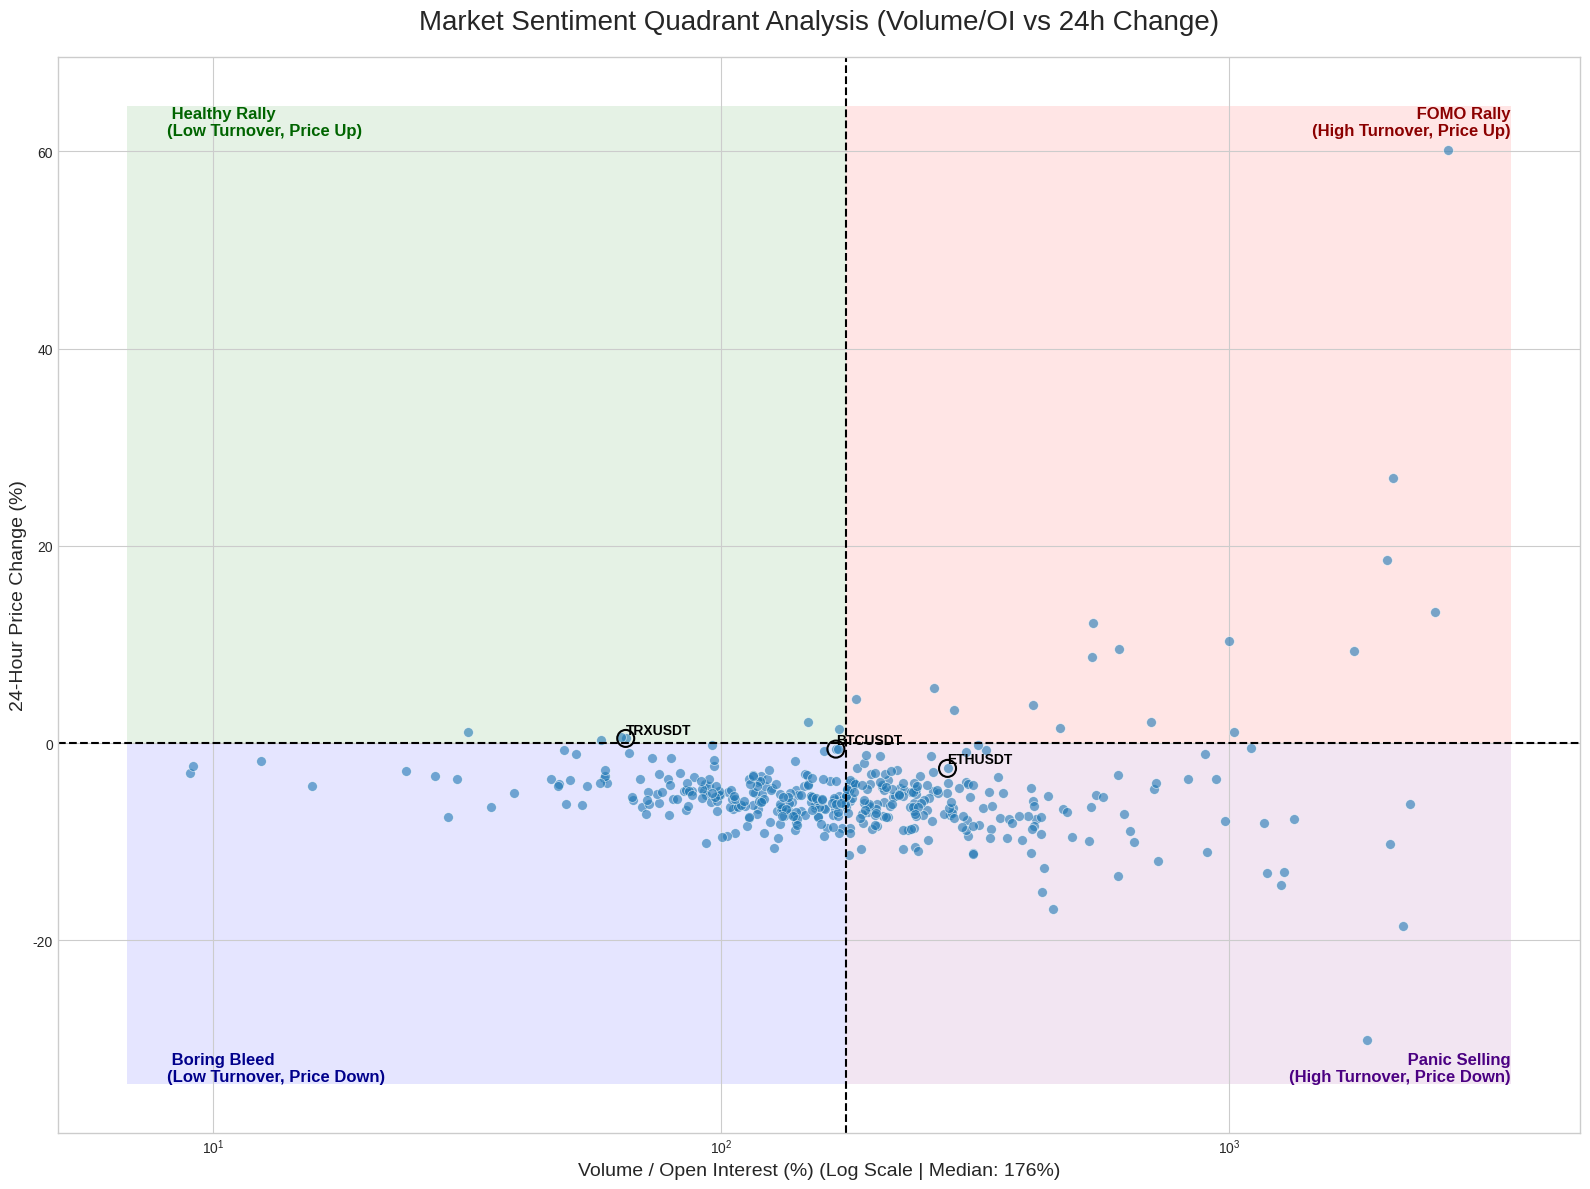


分析FOMO区...
找到 16 个FOMO区币种


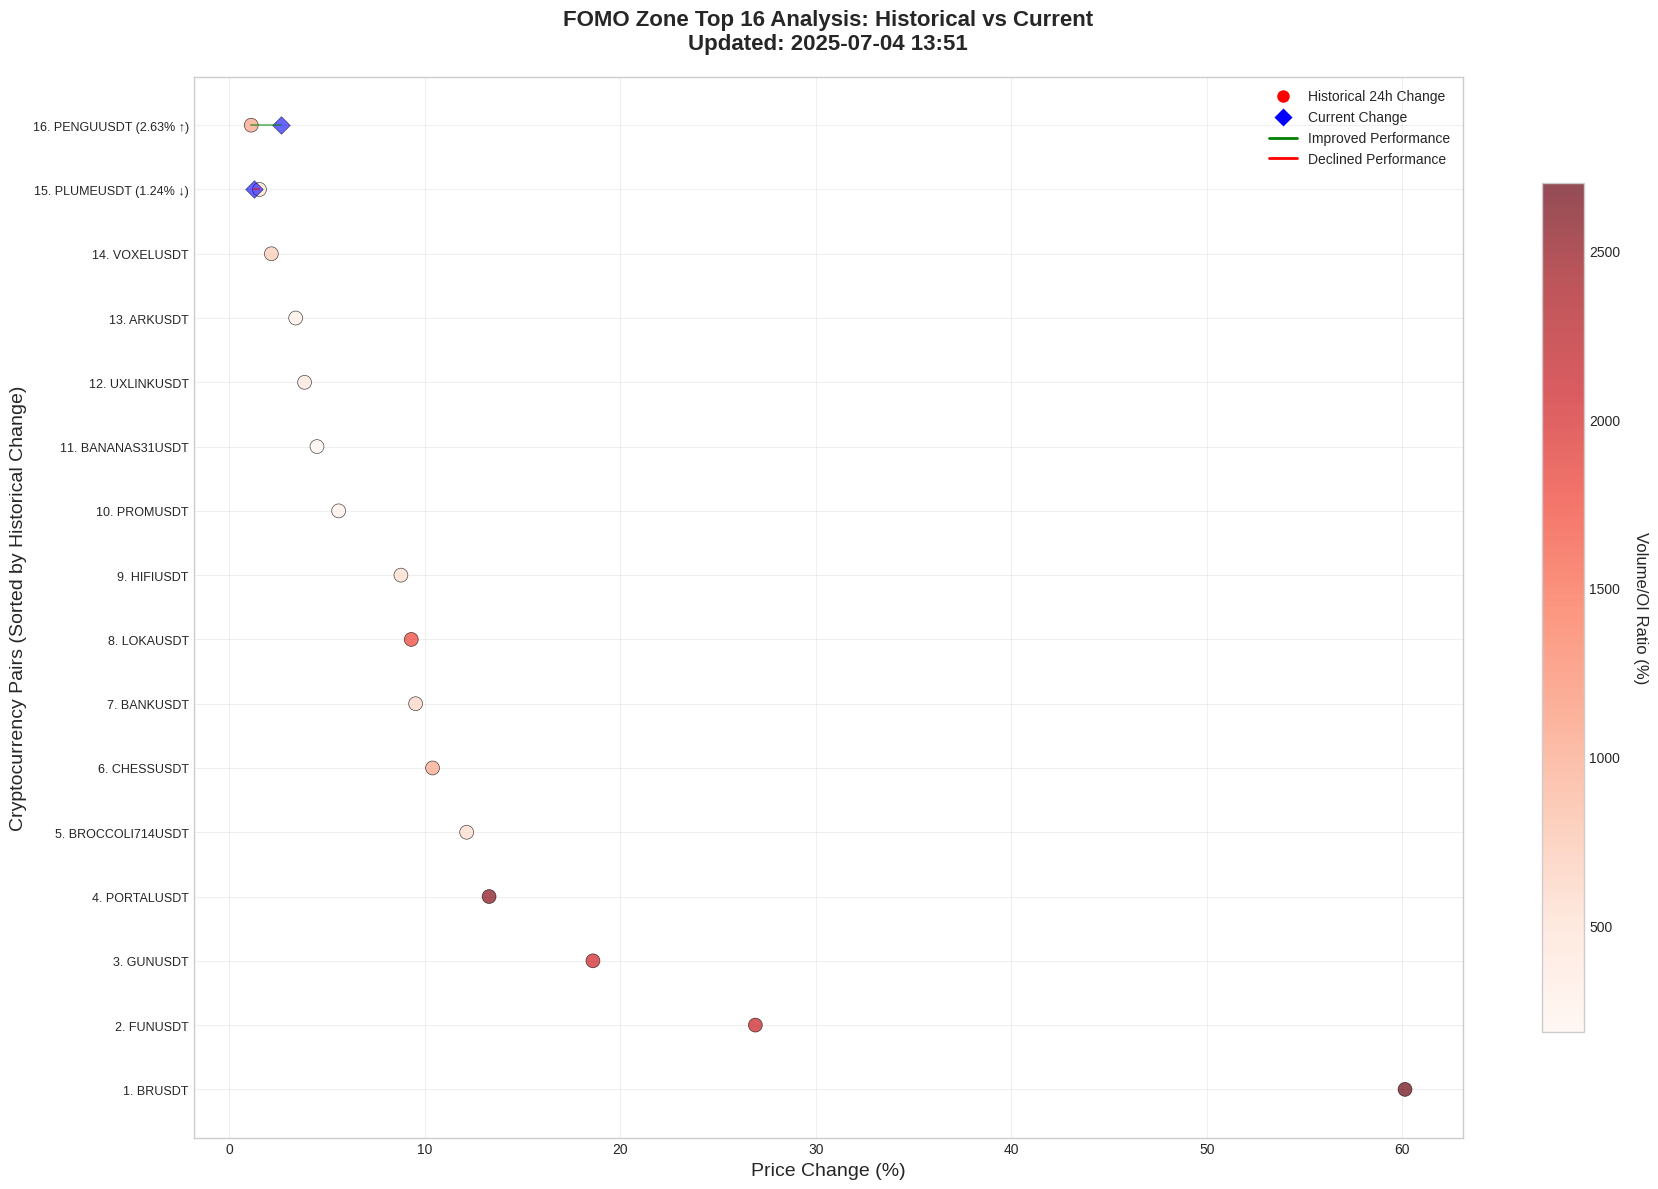


FOMO区统计分析
平均历史涨幅: 11.95%
平均Vol/OI比率: 1074.50%
当前平均涨幅: 1.94%
表现提升币种: 1
表现下降币种: 1

结果已保存到 'fomo_analysis.csv'


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import io
from datetime import datetime
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. --- Data Loading and Parsing ---
# Storing the raw data you provided in a multi-line string
data_string = """
交易对（更新于 2025-07-04 16:06:50）,当前价格,24小时涨跌幅(%),资金费率(%),多空比,24小时交易量,流通市值,流通量,持仓量,持仓价值,持仓价值/流通市值,交易量/流通市值,交易量/持仓价值
BTCUSDT,108682.9,-0.599,0.005009,0.4738,"15,147,910,311","2,157,072,989,460","19,847,400","82,800","8,998,904,451",0.42%,0.70%,168.33%
ETHUSDT,2535.68,-2.555,0.006619,1.3918,"14,079,861,689","305,985,662,434","120,672,034","1,988,258","5,041,585,145",1.65%,4.60%,279.27%
BCHUSDT,476.18,-5.727,0.000979,0.9708,"271,371,785","9,453,230,963","19,852,222","341,776","162,747,126",1.72%,2.87%,166.74%
XRPUSDT,2.2197,-2.739,0.010000,2.3681,"1,475,266,776","129,352,960,982","58,274,974,538","298,771,890","663,183,965",0.51%,1.14%,222.45%
LTCUSDT,87.28,-4.424,0.009129,2.3602,"316,528,095","6,608,431,557","75,715,302","1,744,303","152,242,757",2.30%,4.79%,207.91%
TRXUSDT,0.2853,0.483,0.001866,1.3872,"70,467,056","27,097,814,350","94,980,071,327","380,527,185","108,564,406",0.40%,0.26%,64.91%
ETCUSDT,16.521,-4.143,0.010000,1.6171,"63,798,923","2,501,386,712","151,406,495","1,969,456","32,537,389",1.30%,2.55%,196.08%
LINKUSDT,13.347,-4.006,0.010000,2.3818,"253,342,720","8,516,720,319","638,099,971","6,778,568","90,473,552",1.06%,2.97%,280.02%
XLMUSDT,0.23773,-3.09,-0.006684,1.6371,"54,781,402","7,317,186,329","30,779,398,180","157,673,478","37,483,716",0.51%,0.75%,146.15%
ADAUSDT,0.579,-4.895,0.010000,2.8037,"385,367,094","20,841,659,472","35,995,957,637","254,333,929","147,259,345",0.71%,1.85%,261.69%
XMRUSDT,321.41,-1.263,0.010000,1.1177,"25,372,845","5,928,968,013","18,446,744","38,441","12,355,252",0.21%,0.43%,205.36%
DASHUSDT,19.92,-4.826,0.010000,2.0506,"3,574,791","243,242,161","12,210,952","212,552","4,234,040",1.74%,1.47%,84.43%
ZECUSDT,40.09,1.442,-0.002769,1.1236,"7,085,693","641,013,487","15,989,361","103,690","4,156,920",0.65%,1.11%,170.46%
XTZUSDT,0.536,-3.943,-0.038335,1.8027,"19,165,066","556,378,984","1,038,020,492","11,774,337","6,311,044",1.13%,3.44%,303.68%
BNBUSDT,655.82,-0.986,0.000000,1.2753,"202,330,420","95,675,989,437","145,887,575","468,136","307,012,702",0.32%,0.21%,65.90%
ATOMUSDT,4.04,-5.075,-0.009866,2.5298,"33,589,235","1,792,581,047","443,708,180","7,136,687","28,832,217",1.61%,1.87%,116.50%
ONTUSDT,0.1208,-4.957,-0.032133,2.6101,"2,728,900","110,374,701","913,697,857","21,876,741","2,642,710",2.39%,2.47%,103.26%
IOTAUSDT,0.157,-6.603,0.006762,1.8935,"9,489,470","582,147,881","3,707,948,285","39,476,838","6,197,864",1.06%,1.63%,153.11%
BATUSDT,0.1255,-4.852,0.010000,1.7747,"2,620,876","187,706,379","1,495,668,357","22,567,879","2,832,269",1.51%,1.40%,92.54%
VETUSDT,0.021116,-5.195,0.010000,1.8986,"15,975,101","1,815,660,129","85,985,041,177","628,395,015","13,269,189",0.73%,0.88%,120.39%
NEOUSDT,5.517,-4.517,0.010000,1.6199,"10,771,142","389,114,010","70,530,000","1,551,685","8,560,647",2.20%,2.77%,125.82%
QTUMUSDT,1.98,-3.93,0.005102,1.4802,"4,907,781","209,070,673","105,591,249","2,091,655","4,141,477",1.98%,2.35%,118.50%
IOSTUSDT,0.003272,-4.3,-0.005072,2.1878,"2,956,840","74,965,194","22,911,122,708","740,214,637","2,421,982",3.23%,3.94%,122.08%
THETAUSDT,0.6954,-4.766,0.004010,1.7226,"10,530,222","695,400,000","1,000,000,000","10,797,688","7,508,712",1.08%,1.51%,140.24%
ALGOUSDT,0.1748,-6.972,0.006003,1.8662,"28,272,158","1,496,050,371","8,558,640,568","83,152,945","14,535,135",0.97%,1.89%,194.51%
ZILUSDT,0.01064,-5.422,-0.008332,2.0358,"10,211,632","210,060,386","19,742,517,481","440,704,945","4,689,101",2.23%,4.86%,217.77%
KNCUSDT,0.2895,-4.107,-0.019560,1.6674,"2,154,047","49,259,250","170,152,851","8,002,545","2,316,737",4.70%,4.37%,92.98%
ZRXUSDT,0.2182,-5.007,0.010000,1.3191,"10,589,624","185,120,130","848,396,563","17,445,695","3,806,651",2.06%,5.72%,278.19%
COMPUSDT,41.65,-6.656,-0.001246,0.9022,"19,602,877","372,353,207","8,940,053","445,634","18,560,647",4.98%,5.26%,105.62%
DOGEUSDT,0.16651,-4.584,0.009048,2.6114,"950,080,830","24,760,464,328","148,702,566,383","1,938,389,435","322,761,225",1.30%,3.84%,294.36%
SXPUSDT,0.176,-0.677,-0.041512,1.6205,"10,480,703","112,171,673","637,339,053","17,914,950","3,153,031",2.81%,9.34%,332.40%
KAVAUSDT,0.3984,-3.348,0.010000,1.5221,"6,779,554","431,408,822","1,082,853,469","62,171,134","24,768,980",5.74%,1.57%,27.37%
BANDUSDT,0.5751,-8.598,0.002706,2.7369,"3,318,189","89,682,774","155,942,921","3,565,313","2,050,411",2.29%,3.70%,161.83%
RLCUSDT,0.9133,-4.765,0.010000,2.4106,"1,675,718","66,106,981","72,382,548","1,757,510","1,605,134",2.43%,2.53%,104.40%
MKRUSDT,1869,-6.335,-0.000594,0.5934,"42,096,751","1,578,973,435","844,823","21,093","39,421,985",2.50%,2.67%,106.78%
SNXUSDT,0.571,-6.24,-0.003043,2.1898,"6,991,156","193,835,209","339,466,216","8,009,985","4,573,701",2.36%,3.61%,152.86%
DOTUSDT,3.437,-5.99,0.010000,3.5517,"129,514,053","5,232,031,885","1,522,267,060","17,958,919","61,724,804",1.18%,2.48%,209.82%
YFIUSDT,5095,-3.284,0.000259,1.8944,"5,140,076","172,148,046","33,788",840,"4,279,036",2.49%,2.99%,120.12%
CRVUSDT,0.507,-7.818,0.010000,1.2889,"101,515,483","664,962,748","1,311,563,605","65,765,977","33,343,350",5.01%,15.27%,304.45%
TRBUSDT,36.306,-5.08,0.005000,1.1978,"44,297,007","96,529,034","2,658,763","456,027","16,556,505",17.15%,45.89%,267.55%
RUNEUSDT,1.352,-4.52,0.002989,1.5107,"17,696,831","475,400,587","351,627,653","7,270,097","9,829,171",2.07%,3.72%,180.04%
SUSHIUSDT,0.6006,-6.039,0.007035,1.7397,"16,038,500","115,789,227","192,789,256","11,130,206","6,684,802",5.77%,13.85%,239.92%
EGLDUSDT,13.597,-4.307,0.002096,1.4845,"5,738,842","382,049,811","28,098,096","446,064","6,065,134",1.59%,1.50%,94.62%
SOLUSDT,150.41,-3.286,0.009974,2.0516,"3,137,351,133","77,399,300,205","514,588,792","8,466,078","1,273,382,795",1.65%,4.05%,246.38%
ICXUSDT,0.1214,-5.378,0.002827,1.3261,"4,990,348","128,458,673","1,058,143,926","24,094,364","2,925,056",2.28%,3.88%,170.61%
STORJUSDT,0.2452,-3.843,-0.003478,1.8711,"5,152,321","35,256,680","143,787,439","12,832,897","3,146,626",8.92%,14.61%,163.74%
UNIUSDT,7.288,-5.828,0.010000,1.4643,"280,098,053","4,376,320,641","600,483,074","21,444,194","156,285,286",3.57%,6.40%,179.22%
AVAXUSDT,18.1,-5.201,0.010000,2.8956,"236,524,810","7,516,558,172","415,279,457","5,388,405","97,530,131",1.30%,3.15%,242.51%
ENJUSDT,0.06595,-5.271,0.007213,2.4188,"3,614,664","120,373,264","1,825,220,079","38,613,844","2,546,583",2.12%,3.00%,141.94%
FLMUSDT,0.0314,-7.647,-0.025901,1.7647,"10,525,882","19,132,334","609,309,995","80,285,755","2,520,973",13.18%,55.02%,417.53%
KSMUSDT,12.66,-6.43,0.010000,2.4400,"4,916,714","206,733,078","16,329,627","297,018","3,760,247",1.82%,2.38%,130.76%
NEARUSDT,2.169,-7.268,0.010000,2.6887,"150,176,093","2,602,461,326","1,199,843,857","24,521,345","53,186,797",2.04%,5.77%,282.36%
AAVEUSDT,269.85,-4.525,0.006919,1.2163,"343,427,467","4,074,089,613","15,097,608","564,839","152,421,831",3.74%,8.43%,225.31%
FILUSDT,2.306,-5.337,0.009660,2.3807,"111,165,530","1,492,560,405","647,250,826","21,949,647","50,615,886",3.39%,7.45%,219.63%
RSRUSDT,0.006928,-4.691,0.006758,1.2119,"10,776,667","389,641,536","56,241,561,229","804,137,748","5,571,066",1.43%,2.77%,193.44%
LRCUSDT,0.07319,-8.053,0.010000,2.5587,"5,852,867","91,194,116","1,245,991,469","42,007,985","3,074,564",3.37%,6.42%,190.36%
BELUSDT,0.2327,-5.214,0.010000,2.2082,"17,014,713","18,616,000","80,000,000","13,335,894","3,103,263",16.67%,91.40%,548.28%
AXSUSDT,2.212,-6.627,0.010000,2.1516,"14,864,546","354,274,184","160,160,119","4,015,427","8,882,125",2.51%,4.20%,167.35%
ALPHAUSDT,0.01051,-13.069,0.061216,1.9412,"43,703,200","9,690,220","922,000,000","323,808,480","3,403,227",35.12%,451.00%,1284.17%
ZENUSDT,7.015,-5.305,0.006902,1.5038,"9,315,235","111,921,694","15,954,625","884,996","6,208,243",5.55%,8.32%,150.05%
SKLUSDT,0.01742,-7.192,0.010000,2.1536,"3,163,388","100,615,354","5,775,852,671","132,565,646","2,309,294",2.30%,3.14%,136.99%
GRTUSDT,0.08373,-6.006,0.010000,2.1377,"11,295,448","799,498,543","9,548,531,509","89,855,416","7,523,594",0.94%,1.41%,150.13%
1INCHUSDT,0.1756,-6.146,-0.021805,1.9223,"7,935,902","243,261,886","1,385,318,258","22,285,480","3,913,330",1.61%,3.26%,202.79%
CHZUSDT,0.03576,-3.664,-0.008182,1.7925,"9,275,981","340,170,052","9,512,585,359","210,357,191","7,522,373",2.21%,2.73%,123.31%
SANDUSDT,0.24496,-5.381,0.010000,2.0230,"24,990,843","599,137,162","2,445,857,126","67,884,430","16,628,970",2.78%,4.17%,150.28%
ANKRUSDT,0.01421,-4.31,0.005082,1.8450,"3,819,054","142,100,000","10,000,000,000","184,590,339","2,623,029",1.85%,2.69%,145.60%
RVNUSDT,0.01297,-4.772,-0.004715,0.7857,"17,329,806","194,629,127",15006100733,582207294,"7,551,229",3.88%,8.90%,229.50%
SFPUSDT,0.4483,-3.612,0.010000,1.4728,"1,978,475","224,150,000","500,000,000","9,541,610","4,277,504",1.91%,0.88%,46.25%
COTIUSDT,0.04977,-6.465,0.010000,2.0703,"3,271,211","89,203,220","1,792,309,031","63,010,890","3,136,052",3.52%,3.67%,104.31%
CHRUSDT,0.0804,-5.077,0.010000,2.0807,"3,148,666","67,320,202","837,315,950","28,671,075","2,305,154",3.42%,4.68%,136.59%
MANAUSDT,0.2595,-4.666,-0.002042,1.6788,"16,741,528","484,743,345","1,867,989,769","29,747,958","7,719,595",1.59%,3.45%,216.87%
ALICEUSDT,0.389,-6.49,0.010000,1.8827,"4,816,805","373,706,573","960,685,278","7,025,864","2,733,061",0.73%,1.29%,176.24%
HBARUSDT,0.15453,-3.744,-0.004392,2.0193,"71,154,312","6,525,540,060","42,228,305,571","216,332,239","33,429,821",0.51%,1.09%,212.85%
ONEUSDT,0.00994,-5.96,0.010000,1.8620,"5,531,834","144,302,180","14,517,321,940","403,183,958","4,007,649",2.78%,3.83%,138.03%
DENTUSDT,0.000587,-5.627,0.010000,3.2088,"2,296,347","56,149,462","95,654,960,453","4,856,470,126","2,850,748",5.08%,4.09%,80.55%
CELRUSDT,0.00736,-6.835,0.010000,2.6941,"2,968,004","41,550,548","5,645,454,936","313,555,949","2,307,772",5.55%,7.14%,128.61%
HOTUSDT,0.00084,-4.762,0.010000,2.0139,"4,802,801","149,200,324","177,619,433,541","3,235,495,187","2,717,816",1.82%,3.22%,176.72%
MTLUSDT,0.6735,-3.634,0.010000,2.5881,"1,597,606","57,009,726","84,646,958","3,020,697","2,034,439",3.57%,2.80%,78.53%
OGNUSDT,0.0514,-5.515,0.007586,2.2331,"3,821,047","35,443,073","689,553,957","41,113,080","2,113,212",5.96%,10.78%,180.82%
NKNUSDT,0.02313,-8.757,0.005000,2.6860,"3,547,979","18,185,230","786,218,332","65,712,604","1,519,933",8.36%,19.51%,233.43%
1000SHIBUSDT,0.011536,-4.677,0.010000,2.7272,"112,918,299","6,797,595,244","589,250,627,953","4,045,504,196","46,668,936",0.69%,1.66%,241.96%
BAKEUSDT,0.0995,-6.835,0.010000,2.6403,"4,133,128","28,726,162","288,705,144","28,853,597","2,870,933",9.99%,14.39%,143.96%
GTCUSDT,0.229,-6.911,-0.017180,4.1760,"2,354,492","13,937,712","60,863,372","10,453,013","2,393,740",17.17%,16.89%,98.36%
IOTXUSDT,0.02132,-4.864,-0.003903,1.4528,"6,991,832","201,289,988","9,441,369,057","373,937,483","7,972,347",3.96%,3.47%,87.70%
C98USDT,0.0422,-6.637,0.010000,2.9448,"3,099,512","39,410,105","933,888,740","61,983,962","2,615,723",6.64%,7.86%,118.50%
MASKUSDT,1.221,-3.249,0.001250,1.7375,"18,857,967","122,100,000","100,000,000","10,448,586","12,757,724",10.45%,15.44%,147.82%
ATAUSDT,0.0444,-0.225,0.010000,2.2873,"8,547,888","26,097,966","587,792,028","60,155,568","2,670,907",10.23%,32.75%,320.04%
DYDXUSDT,0.531,-4.152,0.010000,2.2103,"42,622,510","410,495,730","773,061,638","26,235,867","13,931,245",3.39%,10.38%,305.95%
1000XECUSDT,0.01851,-3.392,-0.009177,2.0039,"1,347,636","367,378,295","19,847,557,797","82,481,953","1,526,741",0.42%,0.37%,88.27%
GALAUSDT,0.01415,-6.539,0.010000,1.9533,"65,241,845","620,711,052","43,866,505,431","1,407,427,887","19,915,105",3.21%,10.51%,327.60%
CELOUSDT,0.272,-5.556,-0.004603,1.7473,"11,357,533","154,484,683","567,958,394","16,291,559","4,431,304",2.87%,7.35%,256.30%
ARUSDT,5.154,-5.656,0.001973,2.0931,"14,565,944","337,350,872","65,454,186","1,628,505","8,393,312",2.49%,4.32%,173.54%
ARPAUSDT,0.02052,-6.685,-0.011796,1.5887,"13,322,307","20,154,223","982,174,603","137,734,463","2,826,311",14.02%,66.10%,471.37%
CTSIUSDT,0.0583,-7.313,-0.003671,2.5791,"2,425,563","50,334,834","863,376,228","52,725,908","3,073,920",6.11%,4.82%,78.91%
LPTUSDT,6.024,-4.924,0.000759,1.2707,"40,911,860","237,895,653","39,491,310","2,865,047","17,259,045",7.25%,17.20%,237.05%
ENSUSDT,18.664,-5.379,0.005169,1.2548,"30,308,688","619,002,479","33,165,585","711,425","13,278,040",2.15%,4.90%,228.26%
PEOPLEUSDT,0.01759,-9.377,0.010000,1.9931,"24,950,224","89,118,661","5,066,438,921","462,736,160","8,139,529",9.13%,28.00%,306.53%
ROSEUSDT,0.02436,-6.809,0.010000,1.7533,"6,704,312","163,937,828","6,729,795,898","202,765,642","4,939,371",3.01%,4.09%,135.73%
DUSKUSDT,0.05191,-7.633,0.010000,3.1911,"2,317,892","25,955,000","500,000,000","39,375,486","2,043,981",7.88%,8.93%,113.40%
FLOWUSDT,0.327,-4.942,-0.004360,1.6302,"12,555,413","514,703,457","1,574,016,688","16,065,317","5,253,359",1.02%,2.44%,239.00%
IMXUSDT,0.4405,-5.594,0.005000,1.8935,"13,149,271","789,743,714","1,792,834,764","17,882,752","7,877,352",1.00%,1.67%,166.93%
API3USDT,0.6058,-7.342,0.001503,1.6617,"5,887,628","72,092,714","119,004,151","6,252,829","3,787,964",5.25%,8.17%,155.43%
GMTUSDT,0.04379,-4.032,-0.005181,2.2092,"11,124,858","120,732,380","2,757,076,491","142,482,363","6,239,303",5.17%,9.21%,178.30%
APEUSDT,0.6094,-4.796,0.003911,1.6281,"14,068,312","487,188,177","799,455,492","27,042,727","16,479,838",3.38%,2.89%,85.37%
WOOUSDT,0.06677,-6.235,0.006212,1.9172,"2,972,424","127,891,606","1,915,405,216","38,454,752","2,567,624",2.01%,2.32%,115.77%
JASMYUSDT,0.012215,-6.613,0.008390,1.5031,"16,256,143","591,450,300","48,419,999,999","465,600,807","5,687,314",0.96%,2.75%,285.83%
OPUSDT,0.549,-6.346,0.010000,2.3300,"107,349,002","909,759,305","1,657,120,774","57,336,847","31,477,929",3.46%,11.80%,341.03%
INJUSDT,11.07,-7.596,0.010000,1.7617,"108,292,909","1,081,840,325","97,727,220","2,755,634","30,504,864",2.82%,10.01%,355.00%
STGUSDT,0.1504,-3.652,0.010000,2.1898,"2,170,223","146,108,295","971,464,728","12,724,584","1,913,777",1.31%,1.49%,113.40%
SPELLUSDT,0.0004515,-3.957,-0.022020,1.6969,"3,931,352","71,970,341","159,402,748,146","4,794,174,645","2,164,570",3.01%,5.46%,181.62%
1000LUNCUSDT,0.05593,-4.131,-0.004714,2.4270,"5,505,813","303,987,759","5,435,146,768","66,422,337","3,715,001",1.22%,1.81%,148.20%
LUNA2USDT,0.1476,-4.031,0.002371,2.2310,"5,155,034","101,498,650","687,660,230","19,085,427","2,817,009",2.78%,5.08%,183.00%
LDOUSDT,0.7454,-4.839,0.010000,1.5025,"56,012,782","669,277,698","897,877,244","41,976,444","31,289,241",4.68%,8.37%,179.02%
ICPUSDT,4.834,-5.327,0.010000,2.3852,"32,076,939","2,334,776,484","482,990,584","3,771,540","18,231,624",0.78%,1.37%,175.94%
APTUSDT,4.5143,-6.745,0.006195,2.0084,"128,577,892","2,730,022,943","604,750,004","11,191,887","50,523,534",1.85%,4.71%,254.49%
QNTUSDT,107.54,-2.502,-0.015494,1.7910,"6,281,886","1,564,080,687","14,544,176","31,464","3,383,660",0.22%,0.40%,185.65%
FETUSDT,0.6885,-7.31,0.007236,2.4095,"87,919,985","1,793,514,359","2,604,959,127","51,018,867","35,126,490",1.96%,4.90%,250.30%
FXSUSDT,1.9968,-3.741,0.010000,1.0947,"3,155,173","177,623,102","88,953,877","3,140,328","6,270,608",3.53%,1.78%,50.32%
HOOKUSDT,0.1058,-14.332,0.010000,1.8498,"58,366,499","25,039,333","236,666,666","43,460,714","4,598,144",18.36%,233.10%,1269.35%
MAGICUSDT,0.1232,-5.158,-0.005113,0.7295,"11,948,432","37,514,969","304,504,615","43,300,028","5,334,563",14.22%,31.85%,223.98%
TUSDT,0.01563,-3.697,0.003708,0.7928,"8,282,610","158,290,054","10,127,322,683","295,698,530","4,621,768",2.92%,5.23%,179.21%
HIGHUSDT,0.5011,-7.204,0.010000,2.3003,"2,322,582","50,110,000","100,000,000","3,932,583","1,970,617",3.93%,4.63%,117.86%
MINAUSDT,0.1701,-7.403,0.008695,2.3670,"6,688,091","208,231,456","1,224,170,818","28,159,282","4,789,894",2.30%,3.21%,139.63%
ASTRUSDT,0.02314,-4.222,0.010000,1.5349,"2,306,425","176,565,927","7,630,333,911","125,871,949","2,912,677",1.65%,1.31%,79.19%
PHBUSDT,0.4189,-7.466,0.010000,2.8730,"2,808,327","21,531,786","51,400,778","4,327,732","1,812,887",8.42%,13.04%,154.91%
GMXUSDT,14.256,-3.244,-0.000482,1.8860,"3,815,838","143,227,879","10,046,849","231,079","3,294,260",2.30%,2.66%,115.83%
CFXUSDT,0.07337,-6.104,0.008414,1.2899,"10,249,924","368,965,745","5,028,836,644","102,766,813","7,540,001",2.04%,2.78%,135.94%
STXUSDT,0.6606,-6.484,0.009041,1.4137,"19,458,207","1,004,306,125","1,520,293,862","15,088,011","9,967,140",0.99%,1.94%,195.22%
ACHUSDT,0.018135,-5.729,0.005403,1.6448,"11,059,001","89,653,838","4,943,691,067","242,875,099","4,404,540",4.91%,12.34%,251.08%
SSVUSDT,7.262,-8.574,0.010000,1.1626,"9,401,892","51,456,155","7,085,673","538,785","3,912,658",7.60%,18.27%,240.29%
CKBUSDT,0.003422,-5.234,0.010000,1.5107,"2,712,847","158,314,206","46,263,648,836","795,202,743","2,721,184",1.72%,1.71%,99.69%
PERPUSDT,0.2278,-5.241,-0.013538,2.4014,"1,407,291","16,540,527","72,609,864","6,601,167","1,503,746",9.09%,8.51%,93.59%
TRUUSDT,0.02557,-8.351,0.010000,3.2955,"3,084,864","32,429,119","1,268,248,687","107,275,452","2,743,033",8.46%,9.51%,112.46%
LQTYUSDT,1.1865,-8.829,0.000111,0.6606,"19,361,151","115,511,456","97,354,788","5,365,641","6,366,333",5.51%,16.76%,304.12%
IDUSDT,0.15285,-6.571,-0.005007,2.4200,"4,942,876","17,837,595","116,700,000","20,243,134","3,094,163",17.35%,27.71%,159.75%
ARBUSDT,0.328,-8.252,0.010000,2.3490,"174,490,073","1,514,675,574","4,617,913,336","165,042,060","54,133,796",3.57%,11.52%,322.33%
JOEUSDT,0.14315,-5.841,0.010000,1.8827,"2,175,054","56,752,473","396,454,576","12,799,835","1,832,296",3.23%,3.83%,118.71%
TLMUSDT,0.004234,-5.911,0.000997,3.1322,"2,269,646","24,436,847","5,771,574,516","445,574,339","1,886,562",7.72%,9.29%,120.31%
LEVERUSDT,0.0002041,-30.055,0.047547,1.3540,"79,798,624","7,139,679","34,981,279,404","20,884,284,479","4,262,482",59.70%,1117.68%,1872.12%
RDNTUSDT,0.01907,-8.141,0.008116,2.9730,"2,706,273","23,075,109","1,210,021,451","101,160,761","1,929,136",8.36%,11.73%,140.28%
HFTUSDT,0.11971,-8.085,0.000168,0.8116,"166,119,494","67,001,730","559,700,358","118,564,113","14,193,310",21.18%,247.93%,1170.41%
XVSUSDT,5.846,-3.531,0.005002,1.9138,"1,134,867","97,156,909","16,619,382","329,459","1,926,018",1.98%,1.17%,58.92%
BLURUSDT,0.07005,-6.388,-0.003496,1.7755,"6,614,009","159,617,684","2,278,625,046","48,344,701","3,386,546",2.12%,4.14%,195.30%
EDUUSDT,0.1301,-5.929,0.010000,2.4329,"1,934,452","33,839,552","260,104,168","15,564,012","2,024,878",5.98%,5.72%,95.53%
SUIUSDT,2.9191,-4.26,0.010000,1.6925,"752,964,142","9,487,025,083","3,249,982,900","82,232,206","240,044,033",2.53%,7.94%,313.68%
1000PEPEUSDT,0.0097034,-8.943,0.010000,2.6536,"1,392,815,311","4,082,123,346","420,690,000,000","22,441,604,937","217,759,869",5.33%,34.12%,639.61%
1000FLOKIUSDT,0.07545,-6.471,0.010000,1.3697,"64,172,747","729,144,940","9,663,948,840","158,791,408","11,980,812",1.64%,8.80%,535.63%
UMAUSDT,1.08,-6.494,-0.049797,1.2701,"3,637,043","93,007,446","86,118,006","3,116,115","3,365,404",3.62%,3.91%,108.07%
NMRUSDT,7.308,-3.115,-0.099733,1.7755,"5,007,490","58,503,840","8,005,452","326,446","2,385,664",4.08%,8.56%,209.90%
MAVUSDT,0.04545,-9.462,0.010000,1.4673,"24,016,109","24,845,298","546,651,217","107,458,639","4,883,995",19.66%,96.66%,491.73%
XVGUSDT,0.0052246,-5.858,0.010000,1.6788,"2,916,319","86,320,586","16,521,951,236","568,676,753","2,971,109",3.44%,3.38%,98.16%
WLDUSDT,0.9016,-7.138,0.010000,2.4459,"129,801,827","126,656,991","140,480,247","52,395,946","47,240,185",37.30%,102.48%,274.77%
PENDLEUSDT,3.3543,-7.948,-0.003230,1.1354,"28,335,569","541,611,184","161,467,723","6,753,773","22,654,181",4.18%,5.23%,125.08%
ARKMUSDT,0.4597,-6.165,0.010000,1.7594,"14,225,526","178,258,507","387,771,388","17,652,844","8,115,012",4.55%,7.98%,175.30%
AGLDUSDT,0.6957,-4.002,-0.001188,1.5510,"7,135,992","64,567,918","92,810,001","4,277,352","2,975,754",4.61%,11.05%,239.80%
YGGUSDT,0.1471,-7.484,0.005000,2.0312,"4,660,049","63,395,081","430,965,877","27,931,605","4,108,739",6.48%,7.35%,113.42%
DODOXUSDT,0.03803,-4.963,0.005000,3.8876,"1,197,559","38,030,000","1,000,000,000","27,233,510","1,035,690",2.72%,3.15%,115.63%
BNTUSDT,0.59728,-3.815,-0.003033,2.0139,"2,087,035","68,916,530","115,383,957","2,922,529","1,745,568",2.53%,3.03%,119.56%
OXTUSDT,0.05272,-4.111,0.010000,2.2723,"967,925","31,186,238","591,544,729","38,202,972","2,014,061",6.46%,3.10%,48.06%
SEIUSDT,0.2587,-9.609,-0.045637,1.5767,"207,831,723","1,263,066,819","4,882,361,111","219,808,386","56,864,429",4.50%,16.45%,365.49%
CYBERUSDT,1.196,-6.708,-0.011985,1.8818,"3,773,035","44,534,117","37,235,884","2,404,349","2,875,601",6.46%,8.47%,131.21%
HIFIUSDT,0.145,8.777,0.005000,0.9558,"43,297,662","21,190,166","146,139,077","55,629,590","8,066,291",38.07%,204.33%,536.77%
ARKUSDT,0.396,3.394,-0.135943,1.5189,"9,156,938","73,545,086","185,719,914","8,036,616","3,182,500",4.33%,12.45%,287.73%
BICOUSDT,0.0884,-9.147,0.006166,2.7230,"1,710,501","83,216,340","941,361,308","18,126,402","1,602,374",1.93%,2.06%,106.75%
BIGTIMEUSDT,0.05169,-4.331,-0.005790,1.8952,"6,026,085","93,857,056","1,815,768,155","99,175,266","5,126,369",5.46%,6.42%,117.55%
WAXPUSDT,0.01907,-4.65,0.002746,2.0713,"1,418,095","66,823,178","3,504,099,552","81,010,857","1,544,877",2.31%,2.12%,91.79%
BSVUSDT,23.59,-5.261,-0.055381,1.6695,"7,662,983","468,210,782","19,847,850","328,546","7,750,398",1.66%,1.64%,98.87%
RIFUSDT,0.05293,-4.078,-0.022785,2.2258,"1,197,299","52,930,000","1,000,000,000","37,969,792","2,009,741",3.80%,2.26%,59.57%
POLYXUSDT,0.12386,-4.884,0.001557,1.5887,"2,306,101","142,312,072","1,148,975,228","18,820,308","2,331,083",1.64%,1.62%,98.93%
GASUSDT,2.803,-3.842,0.003086,1.4284,"5,476,307","182,457,306","65,093,581","1,158,432","3,247,086",1.78%,3.00%,168.65%
POWRUSDT,0.1527,-3.598,-0.003955,2.7147,"1,634,736","80,894,640","529,761,885","11,289,181","1,723,858",2.13%,2.02%,94.83%
TIAUSDT,1.57,-5.393,0.005000,2.0312,"186,201,634","923,065,673","587,939,919","26,937,395","42,291,710",4.58%,20.17%,440.28%
CAKEUSDT,2.2504,-6.711,-0.015169,1.7465,"21,730,242","665,183,010","295,584,345","6,032,994","13,576,650",2.04%,3.27%,160.06%
MEMEUSDT,0.001522,-7.925,0.005000,2.2468,"13,615,746","65,144,901","42,802,168,624","3,430,773,352","5,221,637",8.02%,20.90%,260.76%
TWTUSDT,0.6959,-3.293,0.005000,2.1626,"1,921,847","289,946,665","416,649,900","4,671,508","3,250,902",1.12%,0.66%,59.12%
TOKENUSDT,0.0126,-8.762,0.005000,3.1102,"2,006,429","6,372,229","505,732,443","113,780,304","1,433,632",22.50%,31.49%,139.95%
ORDIUSDT,7.568,-8.477,0.005000,2.5249,"54,372,245","158,928,000","21,000,000","2,403,836","18,192,229",11.45%,34.21%,298.88%
STEEMUSDT,0.12956,-2.359,0.005000,2.5211,"1,514,505","65,602,181","506,345,948","12,045,464","1,560,610",2.38%,2.31%,97.05%
ILVUSDT,10.28,-7.287,0.005000,2.1466,"3,417,730","77,109,020","7,500,877","200,497","2,061,106",2.67%,4.43%,165.82%
NTRNUSDT,0.0863,-6.501,0.005000,3.5872,"1,449,816","24,582,329","284,847,384","24,042,094","2,074,833",8.44%,5.90%,69.88%
KASUSDT,0.07546,-7.183,-0.008448,2.4040,"12,022,881","1,954,417,455","25,900,045,779","83,930,532","6,333,398",0.32%,0.62%,189.83%
BEAMXUSDT,0.00582,-3.658,0.005000,1.5602,"32,363,606","305,030,017","52,410,655,848","590,179,742","3,434,846",1.13%,10.61%,942.21%
1000BONKUSDT,0.016769,-3.226,0.005000,0.9755,"187,749,936","1,298,249,144","77,419,592,329","1,847,743,582","30,984,812",2.39%,14.46%,605.94%
PYTHUSDT,0.09832,-7.516,0.004051,1.9291,"18,506,165","356,408,897","3,624,988,786","88,431,137","8,694,549",2.44%,5.19%,212.85%
SUPERUSDT,0.6399,-7.341,-0.006223,1.3132,"7,987,475","289,039,530","451,694,843","5,151,974","3,296,748",1.14%,2.76%,242.28%
USTCUSDT,0.012476,-4.075,0.003629,1.2701,"2,977,752","69,817,498","5,596,144,421","277,992,907","3,468,240",4.97%,4.27%,85.86%
ONGUSDT,0.16755,-3.657,0.005000,1.4290,"1,054,641","68,655,124","409,759,021","9,072,375","1,520,076",2.21%,1.54%,69.38%
ETHWUSDT,1.3188,-3.058,0.005000,1.7824,"1,501,277","142,191,324","107,818,717","1,373,827","1,811,803",1.27%,1.06%,82.86%
JTOUSDT,2.0392,-7.334,0.005000,0.6998,"28,052,688","639,031,327","313,373,542","6,612,942","13,485,111",2.11%,4.39%,208.03%
1000SATSUSDT,0.0000381,-7.073,0.005000,3.5725,"21,083,703","80,010,000","2,100,000,000,000","194,372,367,687","7,405,587",9.26%,26.35%,284.70%
AUCTIONUSDT,8.747,-4.31,-0.044138,2.3102,"5,162,733","57,643,992","6,590,144","602,827","5,272,928",9.15%,8.96%,97.91%
1000RATSUSDT,0.0197,-5.787,0.005000,3.0274,"3,258,805","12,990,541","659,418,303","246,771,687","4,861,402",37.42%,25.09%,67.03%
ACEUSDT,0.4781,-9.399,-0.000812,2.2949,"2,966,628","25,117,735","52,536,572","3,894,841","1,862,123",7.41%,11.81%,159.31%
MOVRUSDT,5.325,-5.417,0.005000,2.5423,"1,276,038","50,740,157","9,528,668","358,452","1,908,758",3.76%,2.51%,66.85%
NFPUSDT,0.0545,-8.557,0.004404,2.7594,"3,090,729","23,236,656","426,360,656","31,556,089","1,719,807",7.40%,13.30%,179.71%
AIUSDT,0.10933,-8.633,0.005000,2.7693,"3,901,320","14,212,900","130,000,000","20,606,695","2,252,930",15.85%,27.45%,173.17%
XAIUSDT,0.05046,-7.345,0.005000,2.6193,"8,952,471","56,407,731","1,117,870,216","104,525,822","5,274,373",9.35%,15.87%,169.74%
WIFUSDT,0.8659,-7.152,0.005000,1.6717,"495,699,159","864,970,363","998,926,392","92,214,797","79,848,792",9.23%,57.31%,620.80%
MANTAUSDT,0.1854,-6.647,-0.034088,3.0064,"8,655,330","75,896,914","409,368,466","23,089,693","4,280,829",5.64%,11.40%,202.19%
ONDOUSDT,0.7683,-4.76,-0.004800,3.0177,"117,512,918","2,427,142,315","3,159,107,529","57,509,042","44,184,197",1.82%,4.84%,265.96%
LSKUSDT,0.3772,-4.892,-0.004653,2.8986,"1,230,193","67,246,350","178,277,704","3,774,716","1,423,823",2.12%,1.83%,86.40%
ALTUSDT,0.02617,-6.066,0.005000,1.0433,"10,966,599","79,368,703","3,032,812,498","253,097,157","6,623,553",8.35%,13.82%,165.57%
JUPUSDT,0.4376,-8.433,-0.004124,1.7100,"61,874,011","437,600,000","1,000,000,000","69,652,561","30,479,961",6.97%,14.14%,203.00%
ZETAUSDT,0.1782,-4.348,-0.024427,2.3887,"6,546,381","139,046,119","780,281,250","15,109,237","2,692,466",1.94%,4.71%,243.14%
RONINUSDT,0.4738,-6.197,-0.193996,1.4396,"153,883,155","293,466,839","619,389,699","14,310,810","6,780,462",2.31%,52.44%,2269.51%
DYMUSDT,0.2295,-7.273,-0.030594,3.4583,"4,355,994","61,033,253","265,940,099","12,949,057","2,971,809",4.87%,7.14%,146.58%
OMUSDT,0.20642,-8.716,0.005000,2.0266,"61,396,570","199,366,317","965,828,490","87,392,378","18,039,535",9.05%,30.80%,340.34%
PIXELUSDT,0.03354,-4.608,0.005000,1.9869,"21,186,827","25,860,738","771,041,667","88,555,124","2,970,139",11.49%,81.93%,713.33%
STRKUSDT,0.1129,-8.211,0.005000,2.6941,"12,852,624","328,005,867","2,905,277,827","86,956,916","9,817,436",2.99%,3.92%,130.92%
GLMUSDT,0.22496,-3.38,-0.013383,1.9121,"9,039,018","224,960,000","1,000,000,000","11,437,433","2,572,965",1.14%,4.02%,351.31%
PORTALUSDT,0.04033,13.287,0.005000,1.4038,"159,860,464","6,740,539","167,134,615","155,426,381","6,268,346",92.99%,2371.63%,2550.28%
TONUSDT,2.792,-4.088,0.005000,1.4956,"51,011,273","6,905,185,102","2,473,203,833","16,045,604","44,799,327",0.65%,0.74%,113.87%
AXLUSDT,0.3181,-5.636,0.001250,1.1668,"6,249,499","300,208,292","943,754,453","16,183,942","5,148,112",1.71%,2.08%,121.39%
MYROUSDT,0.017,-10.573,0.005000,2.8551,"3,797,678","16,999,685","999,981,490","92,903,395","1,579,358",9.29%,22.34%,240.46%
METISUSDT,14.87,-7.467,0.005000,1.5151,"5,393,260","93,886,717","6,313,834","171,860","2,555,565",2.72%,5.74%,211.04%
AEVOUSDT,0.0823,-7.424,0.005000,2.6417,"4,558,463","74,331,408","903,176,281","41,613,583","3,424,798",4.61%,6.13%,133.10%
VANRYUSDT,0.02566,-8.716,0.005000,2.3047,"4,374,645","49,679,430","1,936,065,081","85,914,337","2,204,562",4.44%,8.81%,198.44%
BOMEUSDT,0.001557,-7.651,0.005000,2.3841,"32,106,965","107,432,470","68,999,659,569","5,578,505,135","8,685,732",8.08%,29.89%,369.65%
ETHFIUSDT,0.9386,-9.837,0.005000,1.5661,"84,925,982","215,078,033","229,147,702","23,071,318","21,654,739",10.07%,39.49%,392.18%
ENAUSDT,0.2633,-8.322,0.005000,2.5273,"225,504,606","1,462,137,813","5,553,125,000","425,660,860","112,076,504",7.67%,15.42%,201.21%
WUSDT,0.0679,-8.417,-0.003624,1.5094,"31,711,822","307,210,707","4,524,458,124","149,240,685","10,133,442",3.30%,10.32%,312.94%
TNSRUSDT,0.1194,-4.019,0.002548,2.1516,"17,577,797","39,952,104","334,607,239","20,495,858","2,447,205",6.13%,44.00%,718.28%
SAGAUSDT,0.2087,-9.063,0.005000,2.9277,"10,011,475","23,476,255","112,488,046","26,723,643","5,577,224",23.76%,42.65%,179.51%
TAOUSDT,322.88,-6.107,0.005000,1.2994,"105,206,789","2,764,184,075","8,561,026","131,868","42,577,470",1.54%,3.81%,247.09%
OMNIUSDT,1.502,-7.626,-0.004142,2.4072,"7,460,031","28,738,784","19,133,678","1,729,916","2,598,334",9.04%,25.96%,287.11%
REZUSDT,0.00821,-9.081,0.005000,2.6576,"6,152,791","21,842,642","2,660,492,286","438,496,822","3,600,059",16.48%,28.17%,170.91%
BBUSDT,0.08219,-7.287,0.005000,1.8185,"6,909,130","33,656,805","409,500,000","41,889,201","3,442,873",10.23%,20.53%,200.68%
NOTUSDT,0.001838,-6.033,0.005000,2.6711,"12,963,567","188,315,887","102,456,956,969","3,682,536,355","6,768,502",3.59%,6.88%,191.53%
TURBOUSDT,0.0035836,-8.441,0.005000,1.5549,"32,767,387","247,268,400","69,000,000,000","2,210,320,376","7,920,904",3.20%,13.25%,413.68%
IOUSDT,0.7062,-6.501,-0.047350,2.1377,"16,776,576","106,300,432","150,524,542","15,209,640","10,741,048",10.10%,15.78%,156.19%
ZKUSDT,0.04692,-6.552,0.005000,1.7762,"14,975,531","172,431,000","3,675,000,000","242,405,506","11,373,666",6.60%,8.68%,131.67%
MEWUSDT,0.002637,-7.409,0.005000,1.5119,"16,793,971","234,400,000","88,888,888,888","2,128,197,604","5,612,057",2.39%,7.16%,299.25%
LISTAUSDT,0.2132,-10.72,0.001182,1.3736,"10,157,917","36,824,735","172,723,898","25,207,779","5,374,298",14.59%,27.58%,189.01%
ZROUSDT,1.8398,-6.348,-0.047517,2.0893,"19,342,312","204,499,021","111,152,854","9,424,266","17,338,765",8.48%,9.46%,111.56%
RENDERUSDT,3.173,-6.896,0.004068,2.2383,"29,376,619","1,642,714,740","517,716,590","3,856,154","12,235,577",0.74%,1.79%,240.09%
BANANAUSDT,17.233,-5.261,0.001492,1.4027,"6,238,689","60,089,656","3,486,895","161,542","2,783,845",4.63%,10.38%,224.10%
RAREUSDT,0.04995,-4.108,0.005000,1.3430,"6,186,860","41,447,308","829,775,936","67,568,489","3,375,046",8.14%,14.93%,183.31%
GUSDT,0.01178,-1.34,-0.017580,1.8960,"3,353,596","85,201,206","7,232,700,000","109,746,376","1,292,812",1.52%,3.94%,259.40%
SYNUSDT,0.0879,-10.58,0.005000,4.0736,"2,281,899","19,255,948","219,066,529","20,404,951","1,793,595",9.31%,11.85%,127.22%
SYSUSDT,0.03363,-6.061,0.005000,3.5208,"885,821","27,058,887","804,605,615","34,866,125","1,172,548",4.33%,3.27%,75.55%
VOXELUSDT,0.04891,2.151,0.001250,2.0404,"13,266,998","11,179,724","228,577,478","38,682,101","1,891,942",16.92%,118.67%,701.24%
BRETTUSDT,0.04204,-11.158,0.005000,1.9343,"18,034,276","416,611,480","9,909,882,978","105,091,825","4,418,060",1.06%,4.33%,408.19%
POPCATUSDT,0.3086,-7.02,0.005000,1.3052,"76,635,591","302,421,418","979,978,670","51,661,431","15,942,718",5.27%,25.34%,480.69%
SUNUSDT,0.017323,-1.451,-0.030426,1.4637,"1,365,171","170,386,998","9,835,882,835","107,641,854","1,864,680",1.09%,0.80%,73.21%
DOGSUSDT,0.0001274,-8.805,0.004026,2.3693,"11,602,527","65,833,950","516,750,000,000","39,955,954,525","5,090,389",7.73%,17.62%,227.93%
MBOXUSDT,0.04727,-6.507,-0.012686,2.5945,"2,648,532","23,650,243","500,322,467","23,762,736","1,123,265",4.75%,11.20%,235.79%
CHESSUSDT,0.09239,10.396,0.005000,1.0161,"56,371,639","18,651,835","201,881,532","60,955,743","5,631,701",30.19%,302.23%,1000.97%
FLUXUSDT,0.1988,-3.119,-0.029026,2.3179,"3,126,360","76,023,910","382,414,034","7,975,791","1,585,587",2.09%,4.11%,197.17%
BSWUSDT,0.01373,-18.565,0.052924,1.1918,"86,367,765","6,850,971","498,978,200","285,081,453","3,914,168",57.13%,1260.66%,2206.54%
QUICKUSDT,0.01807,-7.143,-0.084742,2.8052,"1,806,659","13,549,923","749,857,390","140,220,647","2,533,787",18.70%,13.33%,71.30%
NEIROETHUSDT,0.08865,-1.968,0.007898,0.6281,"22,886,357","88,650,000","1,000,000,000","134,885,329","11,957,584",13.49%,25.82%,191.40%
RPLUSDT,4.815,-8.512,0.000103,1.2681,"3,592,997","102,199,316","21,225,195","449,253","2,163,151",2.12%,3.52%,166.10%
POLUSDT,0.18067,-5.611,-0.017418,2.1696,"17,742,206","1,563,072,768","8,651,534,663","93,242,870","16,846,189",1.08%,1.14%,105.32%
UXLINKUSDT,0.3373,3.849,-0.066210,1.7956,"24,206,488","114,074,860","338,200,000","17,416,079","5,874,443",5.15%,21.22%,412.06%
1MBABYDOGEUSDT,0.0011445,-6.426,-0.000574,2.3933,"9,052,104","1,893,739,146","1,654,643,203,283","3,318,805,739","3,798,373",0.20%,0.48%,238.32%
NEIROUSDT,0.0004317,-13.209,0.005000,1.2139,"293,657,003","181,611,873","420,690,000,000","57,089,613,831","24,645,586",13.57%,161.69%,1191.52%
KDAUSDT,0.384,-6.25,0.005000,1.9967,"2,118,359","119,935,308","312,331,532","5,047,823","1,938,364",1.62%,1.77%,109.29%
FIDAUSDT,0.07725,-7.452,-0.027581,1.4160,"19,923,133","76,547,929","990,911,706","60,533,259","4,676,194",6.11%,26.03%,426.05%
FIOUSDT,0.01281,-6.769,-0.006902,3.1597,"1,707,611","10,347,639","807,778,250","156,523,149","2,005,062",19.38%,16.50%,85.17%
CATIUSDT,0.0806,-5.399,0.005000,2.3212,"3,931,225","16,603,600","206,000,000","27,691,730","2,231,953",13.44%,23.68%,176.13%
GHSTUSDT,0.3665,-5.126,0.005000,3.7619,"819,229","18,749,128","51,157,239","2,989,948","1,095,816",5.84%,4.37%,74.76%
LOKAUSDT,0.05602,9.307,0.005000,1.3079,"56,603,177","6,437,612","114,916,312","57,232,641","3,206,173",49.80%,879.26%,1765.44%
HMSTRUSDT,0.000671,-6.935,0.005000,2.1817,"5,797,536","43,195,625","64,375,000,000","6,138,823,534","4,119,151",9.54%,13.42%,140.75%
REIUSDT,0.0153,-4.792,0.005000,3.7237,"2,088,229","14,941,008","976,536,446","65,252,526","998,364",6.68%,13.98%,209.17%
COSUSDT,0.00294,-5.769,0.005000,2.8670,"1,726,017","15,218,789","5,176,458,774","379,452,801","1,115,591",7.33%,11.34%,154.72%
EIGENUSDT,1.1029,-9.621,0.004206,1.1853,"48,962,784","269,652,519","244,494,078","13,130,052","14,481,134",5.37%,18.16%,338.11%
DIAUSDT,0.3752,-5.3,0.005000,2.9355,"1,587,240","44,902,474","119,676,104","2,938,180","1,102,405",2.46%,3.53%,143.98%
1000CATUSDT,0.00727,-9.566,-0.006335,1.2242,"6,167,815","49,071,921","6,749,920,383","654,909,937","4,761,195",9.70%,12.57%,129.54%
SCRUSDT,0.2559,-5.117,0.002462,1.8703,"6,352,309","48,621,000","190,000,000","19,036,600","4,871,466",10.02%,13.06%,130.40%
GOATUSDT,0.09822,-12.639,0.005000,1.9967,"39,458,727","98,219,387","999,993,763","92,935,384","9,128,113",9.29%,40.17%,432.28%
MOODENGUSDT,0.1755,-10.262,0.005000,1.2517,"584,630,238","173,740,049","989,971,791","160,317,542","28,135,729",16.19%,336.50%,2077.89%
SAFEUSDT,0.3981,-4.92,0.005000,1.6123,"1,448,238","225,685,349","566,906,176","5,073,659","2,019,824",0.89%,0.64%,71.70%
SANTOSUSDT,1.906,-1.244,-0.008710,2.4153,"2,399,429","19,147,793","10,046,061","653,268","1,245,128",6.50%,12.53%,192.71%
PONKEUSDT,0.12,-11.118,0.005000,1.8249,"4,174,246","65,954,862","549,623,854","11,118,582","1,334,230",2.02%,6.33%,312.86%
COWUSDT,0.2858,-3.674,0.003605,1.1048,"35,685,380","118,993,935","416,353,866","15,011,164","4,290,191",3.61%,29.99%,831.79%
CETUSUSDT,0.08954,-7.653,0.004891,1.7285,"7,152,410","61,940,506","691,763,523","56,527,249","5,061,450",8.17%,11.55%,141.31%
1000000MOGUSDT,0.9853,-11.282,0.005000,1.0721,"15,713,521","384,826,181","390,567,524","5,091,079","5,016,240",1.30%,4.08%,313.25%
GRASSUSDT,1.0791,-6.974,-0.062643,1.3596,"23,833,829","297,265,694","275,475,576","12,969,185","13,995,048",4.71%,8.02%,170.30%
DRIFTUSDT,0.3934,-0.606,0.001323,1.3063,"3,348,685","115,974,123","294,799,499","5,015,617","1,973,144",1.70%,2.89%,169.71%
SWELLUSDT,0.00892,-5.608,0.005000,2.5638,"1,218,497","19,040,349","2,134,568,239","127,992,083","1,141,689",6.00%,6.40%,106.73%
ACTUSDT,0.03989,-5.474,0.005000,1.4337,"7,589,226","68,206,723","1,709,870,215","195,813,365","7,810,995",11.45%,11.13%,97.16%
PNUTUSDT,0.22535,-9.99,0.005000,1.6267,"180,720,831","225,318,206","999,858,912","123,033,998","27,725,711",12.31%,80.21%,651.82%
HIPPOUSDT,0.001822,-5.449,0.005000,2.2616,"8,119,381","18,220,000","10,000,000,000","1,439,298,254","2,622,401",14.39%,44.56%,309.62%
1000XUSDT,0.04323,-4.591,-0.009111,1.7863,"4,937,190","29,828,700","690,000,000","27,974,456","1,209,336",4.05%,16.55%,408.26%
DEGENUSDT,0.00334,-7.862,-0.010669,1.7949,"14,250,717","74,435,206","22,285,989,945","433,641,546","1,448,363",1.95%,19.15%,983.92%
BANUSDT,0.06053,2.126,0.005000,1.3730,"5,780,830","60,527,691","999,961,859","64,524,683","3,905,679",6.45%,9.55%,148.01%
AKTUSDT,1.066,-1.842,0.005000,2.0798,"3,141,195","263,774,320","247,443,077","2,108,554","2,247,718",0.85%,1.19%,139.75%
SLERFUSDT,0.0672,-6.119,0.005000,2.4083,"1,671,948","33,599,849","499,997,751","14,802,040","994,697",2.96%,4.98%,168.09%
SCRTUSDT,0.1546,-6.189,0.005000,3.8263,"935,125","47,106,987","304,702,375","8,385,254","1,296,360",2.75%,1.99%,72.13%
1000CHEEMSUSDT,0.0014455,-4.297,0.005000,0.6773,"4,307,165","294,409,252","203,672,952,116","19,059,245,123","27,550,139",9.36%,1.46%,15.63%
1000WHYUSDT,0.0000271,-1.095,-0.001291,3.3592,"1,235,513","11,382,000","420,000,000,000","87,909,839,752","2,382,357",20.93%,10.85%,51.86%
THEUSDT,0.2577,-4.201,-0.000359,2.1338,"4,800,517","14,207,290","55,131,122","12,536,739","3,230,718",22.74%,33.79%,148.59%
MORPHOUSDT,1.3416,-5.501,-0.004079,1.7617,"3,327,366","319,002,773","237,777,857","1,826,799","2,450,834",0.77%,1.04%,135.76%
CHILLGUYUSDT,0.05268,-11.965,0.005000,1.6954,"33,321,266","52,677,608","999,954,585","87,249,209","4,596,288",8.73%,63.26%,724.96%
KAIAUSDT,0.1582,-4.063,-0.000621,0.4706,"23,958,902","926,520,724","5,856,641,747","66,396,349","10,503,902",1.13%,2.59%,228.10%
AEROUSDT,0.7486,-6.202,-0.030848,0.6284,"15,378,480","604,427,041","807,409,887","10,481,340","7,846,331",1.30%,2.54%,196.00%
ACXUSDT,0.1341,-5.63,0.005000,2.1289,"1,462,928","54,658,088","407,592,003","13,322,973","1,786,611",3.27%,2.68%,81.88%
ORCAUSDT,1.93,-7.078,0.005000,1.1891,"7,428,811","107,648,753","55,776,556","1,902,127","3,671,105",3.41%,6.90%,202.36%
MOVEUSDT,0.159,-6.36,-0.080430,0.9231,"41,988,900","389,550,000","2,450,000,000","122,640,995","19,499,918",5.01%,10.78%,215.33%
RAYSOLUSDT,2.0781,-7.422,0.003380,1.4814,"19,837,860","604,341,949","290,814,662","2,378,136","4,942,005",0.82%,3.28%,401.41%
KOMAUSDT,0.01793,-4.066,-0.013905,2.5842,"1,872,813","10,864,762","605,954,353","180,686,646","3,239,712",29.82%,17.24%,57.81%
VIRTUALUSDT,1.5869,-5.9,0.005000,0.7999,"184,590,059","1,033,343,341","651,171,051","28,314,762","44,932,696",4.35%,17.86%,410.81%
SPXUSDT,1.2164,-7.336,-0.024993,0.6972,"91,720,164","1,132,459,990","930,993,086","19,482,083","23,698,006",2.09%,8.10%,387.04%
MEUSDT,0.7348,-6.204,0.004274,1.8827,"7,441,925","97,973,116","133,333,037","7,745,561","5,691,438",5.81%,7.60%,130.76%
AVAUSDT,0.5036,-4.945,0.005000,2.2446,"1,471,821","34,101,281","67,715,013","3,826,846","1,927,200",5.65%,4.32%,76.37%
DEGOUSDT,1.0097,-2.848,0.005000,1.6961,"2,461,731","21,203,700","21,000,000","10,162,917","10,261,497",48.39%,11.61%,23.99%
VELODROMEUSDT,0.04577,-5.453,0.005000,2.7216,"1,489,872","41,900,763","915,463,464","24,578,136","1,124,941",2.68%,3.56%,132.44%
MOCAUSDT,0.06976,-4.36,0.005000,1.0838,"2,217,800","151,495,126","2,171,661,783","66,493,754","4,638,604",3.06%,1.46%,47.81%
VANAUSDT,4.307,-6.002,-0.021224,1.0504,"6,145,528","132,655,600","30,800,000","1,191,363","5,131,202",3.87%,4.63%,119.77%
PENGUUSDT,0.01579,1.121,-0.032947,0.7532,"511,588,438","992,565,654","62,860,396,090","3,166,337,678","49,996,472",5.04%,51.54%,1023.25%
LUMIAUSDT,0.224,-8.159,0.000030,2.7439,"2,207,081","16,868,729","75,306,825","6,250,900","1,400,202",8.30%,13.08%,157.63%
USUALUSDT,0.0664,-4.598,-0.030438,2.2873,"15,789,197","50,357,728","758,399,516","134,554,013","8,934,386",17.74%,31.35%,176.72%
AIXBTUSDT,0.12578,-8.663,0.002401,0.7879,"37,755,258","107,618,969","855,612,732","73,426,925","9,235,639",8.58%,35.08%,408.80%
FARTCOINUSDT,1.1682,-5.447,0.005000,1.2316,"505,540,933","1,168,191,680","999,992,878","76,587,499","89,469,516",7.66%,43.28%,565.04%
KMNOUSDT,0.05918,-6.744,0.005000,0.8149,"4,556,754","79,893,000","1,350,000,000","50,900,779","3,012,308",3.77%,5.70%,151.27%
CGPTUSDT,0.08945,-8.65,-0.010498,1.5687,"3,684,443","72,197,523","807,127,142","17,381,656","1,554,789",2.15%,5.10%,236.97%
HIVEUSDT,0.20859,-2.999,0.005000,1.3154,"3,599,403","98,467,165","472,060,813","8,568,967","1,787,401",1.82%,3.66%,201.38%
DEXEUSDT,7.441,0.649,0.005000,0.7504,"6,340,229","424,909,187","57,103,775","1,342,133","9,986,809",2.35%,1.49%,63.49%
PHAUSDT,0.0971,-5.361,0.005000,1.4759,"1,818,168","76,522,779","788,082,172","17,638,137","1,712,663",2.24%,2.38%,106.16%
DFUSDT,0.02821,-5.778,0.005000,2.0175,"2,121,298","28,207,917","999,926,146","104,983,519","2,961,585",10.50%,7.52%,71.63%
GRIFFAINUSDT,0.0416,-13.514,0.005000,2.0139,"29,740,913","41,594,524","999,868,372","118,038,045","4,910,383",11.81%,71.50%,605.67%
AI16ZUSDT,0.151,-9.958,0.005000,1.3403,"51,540,739","166,099,805","1,099,998,708","64,234,214","9,699,366",5.84%,31.03%,531.38%
ZEREBROUSDT,0.02633,-11.317,0.005000,2.0331,"13,920,128","26,329,039","999,963,494","296,235,799","7,799,889",29.62%,52.87%,178.47%
BIOUSDT,0.05147,-9.368,-0.004629,2.5600,"5,352,483","51,470,000","1,000,000,000","101,140,400","5,205,696",10.11%,10.40%,102.82%
COOKIEUSDT,0.1636,-9.212,0.000258,0.7944,"27,418,151","73,587,200","449,799,508","39,191,860","6,411,788",8.71%,37.26%,427.62%
ALCHUSDT,0.14108,1.169,0.012929,0.5547,"18,084,635","697,455,936","4,943,691,067","403,402,520","56,912,028",8.16%,2.59%,31.78%
SWARMSUSDT,0.02571,-11.007,0.005000,1.1692,"88,959,345","25,709,610","999,984,831","382,732,006","9,840,040",38.27%,346.02%,904.05%
SONICUSDT,0.2023,-4.305,-0.006625,1.6392,"2,229,324","72,828,000","360,000,000","20,229,917","4,092,512",5.62%,3.06%,54.47%
DUSDT,0.0317,-1.123,-0.015298,2.7538,"13,276,849","20,386,667","643,112,516","46,715,366","1,480,877",7.26%,65.13%,896.55%
PROMUSDT,7.1,5.592,0.005000,0.4388,"16,120,875","129,575,000","18,250,000","862,983","6,127,179",4.73%,12.44%,263.10%
SUSDT,0.3162,-6.781,0.005000,1.3095,"33,609,750","1,003,935,000","3,175,000,000","55,224,307","17,461,926",1.74%,3.35%,192.47%
SOLVUSDT,0.04258,-3.665,0.005000,0.8643,"8,102,799","63,129,108","1,482,600,000","629,432,215","26,801,224",42.45%,12.84%,30.23%
ARCUSDT,0.02718,-15.062,0.005000,1.8944,"19,964,836","27,179,864","999,994,999","171,211,115","4,653,518",17.12%,73.45%,429.03%
AVAAIUSDT,0.02933,-7.68,0.005000,1.4606,"33,357,524","29,326,353","999,875,667","84,561,296","2,480,183",8.46%,113.75%,1344.96%
TRUMPUSDT,8.645,-4.285,0.003887,3.1964,"207,890,588","1,728,999,798","199,999,977","11,601,736","100,297,009",5.80%,12.02%,207.27%
MELANIAUSDT,0.2011,-5.72,0.005000,2.9825,"14,898,429","30,165,000","150,000,000","38,719,370","7,786,465",25.81%,49.39%,191.34%
VTHOUSDT,0.001908,-5.824,0.005000,2.1776,"1,812,578","167,956,324","88,027,423,480","857,842,808","1,636,764",0.97%,1.08%,110.74%
ANIMEUSDT,0.01692,-4.244,0.005000,0.6570,"12,397,043","93,713,191","5,538,604,656","387,488,883","6,556,312",7.00%,13.23%,189.09%
VINEUSDT,0.02876,-9.843,0.005000,1.7352,"9,651,038","28,759,547","999,984,236","131,111,409","3,770,764",13.11%,33.56%,255.94%
PIPPINUSDT,0.01573,-9.494,0.005000,1.6853,"3,585,326","15,729,157","999,946,423","226,550,577","3,563,641",22.66%,22.79%,100.61%
VVVUSDT,2.745,-6.025,0.005000,1.2012,"4,318,563","78,580,891","28,626,918","914,575","2,510,507",3.19%,5.50%,172.02%
BERAUSDT,1.657,-8.25,-0.014425,1.0982,"18,075,039","1,789,382,651","1,079,892,970","7,717,310","12,787,582",0.71%,1.01%,141.35%
TSTUSDT,0.04121,-3.012,0.005000,1.0773,"2,180,296","39,064,765","947,943,833","588,642,667","24,257,964",62.10%,5.58%,8.99%
LAYERUSDT,0.6284,-4.745,-0.007264,1.2543,"16,363,560","131,964,000","210,000,000","20,786,107","13,061,989",9.90%,12.40%,125.28%
HEIUSDT,0.2649,-6.13,-0.000527,1.8193,"2,226,674","20,267,386","76,509,573","16,993,345","4,501,537",22.21%,10.99%,49.46%
B3USDT,0.002568,-6.277,0.005000,1.8329,"1,092,386","53,009,507","20,642,331,339","798,883,222","2,051,532",3.87%,2.06%,53.25%
IPUSDT,2.91061,-2.725,-0.055017,0.7513,"7,535,783","754,579,150","259,251,205","4,385,500","12,764,481",1.69%,1.00%,59.04%
GPSUSDT,0.0249,-5.431,-0.008238,1.0367,"4,558,743","45,153,660","1,813,400,000","121,244,778","3,018,995",6.69%,10.10%,151.00%
SHELLUSDT,0.143,-6.352,0.005000,1.0247,"3,085,095","38,610,000","270,000,000","25,014,589","3,577,086",9.26%,7.99%,86.25%
KAITOUSDT,1.5635,-2.846,-0.017806,0.6028,"51,646,204","377,411,528","241,388,889","15,262,256","23,862,536",6.32%,13.68%,216.43%
REDUSDT,0.2812,-9.085,-0.003913,1.7315,"3,068,974","78,736,000","280,000,000","8,985,230","2,526,647",3.21%,3.90%,121.46%
VICUSDT,0.1573,-5.012,0.005000,4.6980,"1,008,123","18,959,168","120,528,724","6,675,647","1,050,079",5.54%,5.32%,96.00%
EPICUSDT,0.7752,-10.09,0.005000,2.2669,"2,566,713","16,474,341","21,251,730","3,545,219","2,748,254",16.68%,15.58%,93.39%
BMTUSDT,0.13616,-3.165,0.005000,0.6625,"10,323,994","34,881,591","256,180,900","100,483,899","13,681,888",39.22%,29.60%,75.46%
MUBARAKUSDT,0.0372,-5.029,0.000879,1.0648,"22,774,749","37,200,000","1,000,000,000","170,525,838","6,343,561",17.05%,61.22%,359.02%
FORMUSDT,2.7986,-1.845,0.005000,0.3843,"5,845,031","808,652,582","288,948,968","16,857,590","47,177,650",5.83%,0.72%,12.39%
BIDUSDT,0.15236,-0.846,-0.002094,0.3918,"29,584,124","40,903,601","268,466,797","63,808,279","9,721,829",23.77%,72.33%,304.31%
TUTUSDT,0.06094,0.296,0.005000,0.3284,"17,576,445","55,114,856","904,411,812","497,267,925","30,303,507",54.98%,31.89%,58.00%
BROCCOLI714USDT,0.04203,12.14,0.005000,0.6184,"39,765,261","42,030,000","1,000,000,000","175,134,338","7,360,896",17.51%,94.61%,540.22%
BROCCOLIF3BUSDT,0.009216,-3.92,-0.080965,2.1397,"4,672,876","9,216,000","1,000,000,000","246,198,135","2,268,962",24.62%,50.70%,205.95%
SIRENUSDT,0.04209,-6.529,0.022429,0.9051,"5,433,550","31,167,446","740,495,269","45,967,036","1,934,753",6.21%,17.43%,280.84%
BANANAS31USDT,0.013421,4.484,0.005000,0.2519,"104,548,057","134,210,000","10,000,000,000","4,216,621,923","56,591,283",42.17%,77.90%,184.74%
BRUSDT,0.12766,60.135,-0.170263,0.4132,"300,647,647","26,808,600","210,000,000","87,213,407","11,133,664",41.53%,1121.46%,2700.35%
PLUMEUSDT,0.1053,1.543,0.005000,1.1896,"32,612,553","210,600,000","2,000,000,000","66,665,942","7,019,924",3.33%,15.49%,464.57%
NILUSDT,0.2887,-5.095,0.005000,1.3386,"3,766,974","56,339,805","195,150,000","33,421,193","9,648,699",17.13%,6.69%,39.04%
PARTIUSDT,0.1733,-16.763,-0.148099,1.3277,"28,305,750","40,378,900","233,000,000","36,219,066","6,276,764",15.54%,70.10%,450.96%
JELLYJELLYUSDT,0.02055,-10.769,0.005000,0.7355,"13,386,725","20,549,981","999,999,099","285,621,916","5,869,530",28.56%,65.14%,228.07%
PAXGUSDT,3344.81,-0.232,0.005000,1.4655,"44,420,186","742,380,590","221,950","13,843","46,301,650",6.24%,5.98%,95.94%
WALUSDT,0.4175,-2.907,-0.020835,1.0178,"12,354,079","521,875,000","1,250,000,000","11,306,145","4,720,316",0.90%,2.37%,261.72%
FUNUSDT,0.012499,26.906,-0.278414,0.6173,"582,139,972","132,475,391","10,598,879,189","2,210,753,423","27,632,207",20.86%,439.43%,2106.74%
MLNUSDT,6.871,-3.808,0.005000,3.0519,"1,151,042","20,621,510","3,001,239","183,800","1,262,890",6.12%,5.58%,91.14%
GUNUSDT,0.03284,18.599,-0.320738,1.3321,"174,059,666","19,851,780","604,500,000","258,999,239","8,505,535",42.85%,876.80%,2046.43%
ATHUSDT,0.02663,-6.43,0.005000,1.0942,"5,785,204","210,358,963","7,899,322,677","616,695,634","16,422,605",7.81%,2.75%,35.23%
BABYUSDT,0.0485,-5.605,0.005000,1.0509,"7,179,998","46,296,498,587","954,566,981,182","96,379,328","4,674,397",0.01%,0.02%,153.60%
PROMPTUSDT,0.1335,-5.72,0.005000,1.6731,"3,207,150","29,890,691","223,900,304","15,219,787","2,031,842",6.80%,10.73%,157.84%
XCNUSDT,0.01403,-4.101,-0.085592,1.3337,"2,195,929","470,530,923","33,537,485,617","122,191,394","1,714,345",0.36%,0.47%,128.09%
STOUSDT,0.06824,-6.661,0.005000,2.5600,"3,642,385","15,376,747","225,333,333","39,708,481","2,709,707",17.62%,23.69%,134.42%
FHEUSDT,0.07008,-7.534,0.005000,1.0960,"1,512,927","17,449,920","249,000,000","74,429,868","5,216,045",29.89%,8.67%,29.01%
KERNELUSDT,0.1053,-7.388,0.005000,2.7341,"4,322,080","17,098,877","162,382,496","31,193,402","3,284,665",19.21%,25.28%,131.58%
WCTUSDT,0.3048,-5.693,-0.001260,1.4295,"15,613,223","56,753,760","186,200,000","32,457,444","9,893,029",17.43%,27.51%,157.82%
INITUSDT,0.421,-10.899,0.001877,0.7982,"27,995,627","62,623,750","148,750,000","27,183,785","11,444,373",18.27%,44.70%,244.62%
AERGOUSDT,0.11334,-4.459,-0.018240,0.8921,"7,925,200","53,553,149","472,499,995","33,162,079","3,758,590",7.02%,14.80%,210.86%
BANKUSDT,0.067412,9.528,0.005000,0.6236,"23,088,899","28,666,953","425,250,000","56,318,486","3,796,542",13.24%,80.54%,608.16%
EPTUSDT,0.00425,-5.24,0.005000,1.3804,"3,147,505","9,845,479","2,316,583,333","846,446,598","3,597,398",36.54%,31.97%,87.49%
DEEPUSDT,0.14408,-5.984,-0.019871,1.1295,"13,991,795","360,200,000","2,500,000,000","34,252,217","4,935,059",1.37%,3.88%,283.52%
HYPERUSDT,0.1049,-4.201,0.005000,2.3490,"6,171,168","18,378,480","175,200,000","23,148,016","2,428,227",13.21%,33.58%,254.14%
MEMEFIUSDT,0.001125,-5.542,0.005000,2.0460,"2,110,314","11,250,000","10,000,000,000","2,045,934,435","2,301,676",20.46%,18.76%,91.69%
FISUSDT,0.07671,-8.055,0.005000,2.7566,"3,347,449","11,714,230","152,707,995","11,649,758","893,653",7.63%,28.58%,374.58%
JSTUSDT,0.034523,-0.673,-0.020718,1.2517,"1,046,504","341,777,700","9,900,000,000","61,644,000","2,128,136",0.62%,0.31%,49.17%
SIGNUSDT,0.06536,-3.356,0.001250,0.8386,"7,414,276",78432000,1200000000,"97,986,584","6,404,403",8.17%,9.45%,115.77%
PUNDIXUSDT,0.2806,-3.574,-0.008084,2.4566,"2,248,482","72,503,263","258,386,541","5,466,123","1,486,330",2.05%,3.21%,151.28%
AIOTUSDT,0.15163,-7.402,-0.195029,1.6596,"1,297,898","4,548,900","30,000,000","6,163,035","934,501",20.54%,28.53%,138.89%
DOLOUSDT,0.037845,-4.967,0.005000,1.4114,"2,221,434","13,688,309","361,694,000","32,136,673","1,216,212",8.89%,16.23%,182.65%
HAEDALUSDT,0.123947,-0.815,0.005000,1.0738,"15,378,621","24,169,665","195,000,000","77,866,186","9,651,280",39.93%,63.63%,159.34%
SXTUSDT,0.07126,-6.495,-0.057259,1.7248,"11,087,182","356,300,000","5,000,000,000","63,748,084","4,542,688",1.27%,3.11%,244.07%
ASRUSDT,2.245,-2.306,0.005000,1.0342,"937,432","16,597,101","7,392,918","4,568,879","10,257,132",61.80%,5.65%,9.14%
ALPINEUSDT,0.6928,-2.697,0.002009,3.9900,"815,026","7,870,208",11360000,"945,467","655,019",8.32%,10.36%,124.43%
B2USDT,0.4138,-1.476,0.005000,1.0113,"2,356,399","17,191,683",41545875,"7,156,221","2,961,244",17.22%,13.71%,79.57%
MILKUSDT,0.04825,-4.964,0.005000,1.1944,"4,782,183","12,545,000",260000000,"29,342,027","1,415,753",11.29%,38.12%,337.78%
SYRUPUSDT,0.5229,-6.346,-0.007884,0.5620,"62,634,131","561,507,323",1073833091,"28,988,191","15,157,925",2.70%,11.15%,413.21%
OBOLUSDT,0.13536,-3.631,0.005000,2.1636,"3,357,898","13,362,719",98719850,"15,588,568","2,110,069",15.79%,25.13%,159.14%
DOODUSDT,0.0024527,-7.081,0.005000,1.7233,"3,291,538","19,131,060",7800000000,"754,908,769","1,851,565",9.68%,17.21%,177.77%
OGUSDT,4.01,-1.716,0.005000,2.3333,"1,573,205","17,243,000",4300000,"405,797","1,627,245",9.44%,9.12%,96.68%
ZKJUSDT,0.1772,-7.225,0.005000,1.3736,"14,061,641","51,894,989",292861110,"32,944,991","5,837,852",11.25%,27.10%,240.87%
SKYAIUSDT,0.05074,-0.49,0.005000,1.0040,"85,932,737","50,740,000",1000000000,"153,501,519","7,788,667",15.35%,169.36%,1103.30%
NXPCUSDT,0.91076,-6.156,0.005000,0.5845,"28,047,960",0,0,"14,167,761","12,903,430",#DIV/0!,#DIV/0!,217.37%
AGTUSDT,0.016252,-7.549,0.005000,1.0243,"3,707,069",0,0,"121,379,516","1,972,660",#DIV/0!,#DIV/0!,187.92%
AWEUSDT,0.057573,-8.307,-0.242149,1.0907,"44,763,850",0,0,"69,224,569","3,985,466",,,
BUSDT,0.38863,-2.054,0.005000,0.6485,"25,737,358",0,0,"98,342,773","38,218,952",,,
SOONUSDT,0.23444,-6.486,0.005000,1.9112,"14,857,888",0,0,"38,949,530","9,131,328",,,
HUMAUSDT,0.032368,-5.318,-0.007195,0.8875,"27,123,140",0,0,"247,453,103","8,009,562",,,
AUSDT,0.48236,-4.39,-0.002254,0.7724,"6,837,549",0,0,"17,566,018","8,473,144",,,
SOPHUSDT,0.032412,-1.826,-0.001837,0.6664,"16,388,882",0,0,"199,150,160","6,454,855",,,
MERLUSDT,0.09759,-2.905,-0.019028,1.3047,"6,565,905",0,0,"34,562,681","3,372,972",,,
HYPEUSDT,38.432,-5.945,0.005000,1.4746,"250,295,105",0,0,"2,898,220","111,384,398",,,
BDXNUSDT,0.03133,-1.725,0.005000,1.2432,"5,983,723",0,0,"78,608,799","2,462,814",,,
PUFFERUSDT,0.16351,-2.539,-0.057634,1.6199,"5,140,974",0,0,"4,484,562","733,271",,,
PORT3USDT,0.04315,7.392,0.039362,0.8093,"4,200,438",0,0,"46,806,799","2,019,713",,,
1000000BOBUSDT,0.0513,-3.408,-0.000853,0.9294,"22,808,173",0,0,"51,446,684","2,639,215",,,
LAUSDT,0.495,-6.427,0.001250,0.7486,"25,255,470",0,0,"7,463,826","3,694,594",,,
SKATEUSDT,0.0403,-6.344,0.005000,0.6145,"8,722,137",0,0,"85,777,061","3,456,816",,,
HOMEUSDT,0.019803,-2.318,-0.047942,0.4892,"13,894,526",0,0,"219,542,545","4,347,601",,,
RESOLVUSDT,0.1472,-5.197,0.005000,0.7446,"61,697,497",0,0,"72,398,921","10,657,121",,,
TAIKOUSDT,0.3954,2.648,-0.078876,1.4420,"8,365,453",0,0,"5,172,609","2,045,250",,,
SQDUSDT,0.1781,-0.23,-0.343792,1.0458,"18,972,351",0,0,"9,499,741","1,691,904",,,
PUMPBTCUSDT,0.03663,-7.054,0.005000,1.0734,"1,612,865",0,0,"14,556,047","533,188",,,
SPKUSDT,0.03224,-10.02,-0.089947,0.5286,"52,470,287",0,0,"261,878,131","8,442,951",,,
MYXUSDT,0.0578,-7.208,0.013439,1.3987,"145,826,011",0,0,"189,259,434","10,939,195",,,
FUSDT,0.008832,-1.834,-0.123015,0.6717,"3,128,513",0,0,"119,184,737","1,052,640",,,
NEWTUSDT,0.3435,-1.378,-0.040875,0.5957,"96,059,624",0,0,"33,397,429","11,472,017",,,
DMCUSDT,0.008032,7.122,0.005000,0.4637,"122,918,127",0,0,"795,350,450","6,388,255",,,
HUSDT,0.08246,23.111,-0.240391,0.6720,"928,819,633",0,0,"355,472,964","29,312,301",,,
OLUSDT,0.02835,-6.467,0.005000,0.9037,"7,716,150",0,0,"38,792,608","1,099,770",,,
SAHARAUSDT,0.07994,0.175,0.001250,0.8123,"198,302,166",0,0,"262,337,471","20,971,257",,,
ICNTUSDT,0.3246,-23.981,0.005000,1.3579,"356,741,420",0,0,"15,508,537","5,034,071",,,
"""

# Convert the string data into a pandas DataFrame
# 转换数据
# 转换数据
data_io = io.StringIO(data_string)
df = pd.read_csv(data_io)

# 2. --- 数据清理和转换 ---
df.rename(columns={
    '交易对（更新于 2025-07-04 16:06:50）': 'ticker',
    '24小时涨跌幅(%)': 'change_24h',
    '交易量/持仓价值': 'vol_oi_ratio'
}, inplace=True)

# 选择需要的列
df_selected = df[['ticker', 'change_24h', 'vol_oi_ratio']].copy()

# 清理 vol_oi_ratio 列
df_selected['vol_oi_ratio'] = (df_selected['vol_oi_ratio']
                               .astype(str)
                               .str.replace('%', '', regex=False)
                               .str.replace(',', '', regex=False))

# 移除非数值行
df_selected.dropna(subset=['vol_oi_ratio'], inplace=True)
df_selected = df_selected[pd.to_numeric(df_selected['vol_oi_ratio'], errors='coerce').notna()]
df_selected['vol_oi_ratio'] = df_selected['vol_oi_ratio'].astype(float)
df_selected['change_24h'] = df_selected['change_24h'].astype(float)

# 移除无限值和NaN
df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
df_selected.dropna(inplace=True)

# 3. --- 象限分析图 ---
def create_quadrant_plot(df_data):
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 12))

    # 计算中位数分割线
    median_vol_oi_ratio = df_data['vol_oi_ratio'].median()
    y_center = 0

    # 绘制散点图
    scatter = sns.scatterplot(
        data=df_data,
        x='vol_oi_ratio',
        y='change_24h',
        alpha=0.6,
        s=50,
        ax=ax
    )
    ax.set_xscale('log')  # 对数尺度

    # 获取图表边界
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 定义颜色映射 - 修复颜色名称
    color_map = {
        'red': '#8B0000',      # darkred
        'green': '#006400',    # darkgreen
        'blue': '#00008B',     # darkblue
        'purple': '#4B0082'    # indigo (替代darkpurple)
    }

    # 象限背景和标签
    quadrants = [
        (median_vol_oi_ratio, y_center, xlim[1]-median_vol_oi_ratio, ylim[1]-y_center,
         'red', 'FOMO Rally\n(High Turnover, Price Up)', 'right', 'top'),
        (xlim[0], y_center, median_vol_oi_ratio-xlim[0], ylim[1]-y_center,
         'green', 'Healthy Rally\n(Low Turnover, Price Up)', 'left', 'top'),
        (xlim[0], ylim[0], median_vol_oi_ratio-xlim[0], y_center-ylim[0],
         'blue', 'Boring Bleed\n(Low Turnover, Price Down)', 'left', 'bottom'),
        (median_vol_oi_ratio, ylim[0], xlim[1]-median_vol_oi_ratio, y_center-ylim[0],
         'purple', 'Panic Selling\n(High Turnover, Price Down)', 'right', 'bottom')
    ]

    for x, y, w, h, color, label, ha, va in quadrants:
        ax.add_patch(Rectangle((x, y), w, h, facecolor=color, alpha=0.1, zorder=0))
        text_x = xlim[1] if ha == 'right' else xlim[0]*1.2
        text_y = ylim[1] if va == 'top' else ylim[0]
        ax.text(text_x, text_y, f' {label}', ha=ha, va=va, fontsize=12,
                color=color_map[color], weight='bold')

    # 中心线
    ax.axhline(y_center, color='black', linestyle='--', linewidth=1.5)
    ax.axvline(median_vol_oi_ratio, color='black', linestyle='--', linewidth=1.5)

    # 标题和标签
    ax.set_title('Market Sentiment Quadrant Analysis (Volume/OI vs 24h Change)',
                 fontsize=20, pad=20)
    ax.set_xlabel(f'Volume / Open Interest (%) (Log Scale | Median: {median_vol_oi_ratio:.0f}%)',
                  fontsize=14)
    ax.set_ylabel('24-Hour Price Change (%)', fontsize=14)

    # 标注重要点
    examples = {
        'BTCUSDT': 'Top-Left', 'ETHUSDT': 'Top-Left', 'TRXUSDT': 'Bottom-Left'
    }

    for ticker, quad in examples.items():
        point = df_data[df_data['ticker'] == ticker]
        if not point.empty:
            ax.text(point['vol_oi_ratio'].values[0],
                   point['change_24h'].values[0] + 0.5,
                   ticker, fontsize=10, weight='bold', color='black')
            ax.scatter(point['vol_oi_ratio'], point['change_24h'],
                      s=150, facecolors='none', edgecolors='black', linewidth=1.5)

    plt.tight_layout()
    return fig, ax

# 4. --- CoinMarketCap API 获取数据 ---
def get_cmc_data(api_key):
    """获取 CoinMarketCap 最新数据"""
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    headers = {
        'X-CMC_PRO_API_KEY': api_key,
        'Accept': 'application/json'
    }
    params = {
        'start': '1',
        'limit': '200',
        'convert': 'USD'
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()

        coins = []
        for coin in data['data']:
            ticker = coin['symbol'] + 'USDT'
            price = coin['quote']['USD']['price']
            percent_change_24h = coin['quote']['USD']['percent_change_24h']

            coins.append({
                'ticker': ticker,
                'current_price': price,
                'current_change_24h': percent_change_24h
            })

        return pd.DataFrame(coins)
    except Exception as e:
        print(f"API请求错误: {e}")
        return pd.DataFrame()

# 5. --- FOMO区分析 ---
def analyze_fomo_zone(df_data, api_key=None, top_n=20):
    """分析FOMO区币种"""
    median_vol_oi_ratio = df_data['vol_oi_ratio'].median()

    # 筛选FOMO区（右上象限）
    fomo_zone = df_data[
        (df_data['vol_oi_ratio'] >= median_vol_oi_ratio) &
        (df_data['change_24h'] > 0)
    ].copy()

    # 按涨幅排序，取前N名
    fomo_zone = fomo_zone.sort_values('change_24h', ascending=False).head(top_n)

    # 如果有API密钥，获取最新数据
    if api_key:
        cmc_data = get_cmc_data(api_key)
        if not cmc_data.empty:
            fomo_zone = fomo_zone.merge(cmc_data, on='ticker', how='left')
            fomo_zone['change_diff'] = (fomo_zone['current_change_24h'] -
                                       fomo_zone['change_24h'])
        else:
            fomo_zone['current_change_24h'] = np.nan
            fomo_zone['change_diff'] = np.nan

    return fomo_zone

# 6. --- FOMO区可视化 ---
def create_fomo_comparison(fomo_data):
    """创建FOMO区对比图"""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(18, 12))

    y_pos = range(len(fomo_data))

    # 历史涨幅散点
    scatter1 = ax.scatter(fomo_data['change_24h'], y_pos, s=100,
                         c=fomo_data['vol_oi_ratio'], cmap='Reds',
                         alpha=0.7, edgecolors='black', linewidth=0.5,
                         label='Historical 24h Change')

    # 如果有当前数据，添加对比
    if 'current_change_24h' in fomo_data.columns:
        valid_current = fomo_data.dropna(subset=['current_change_24h'])
        if not valid_current.empty:
            y_valid = [i for i, (idx, row) in enumerate(fomo_data.iterrows())
                      if not pd.isna(row['current_change_24h'])]

            scatter2 = ax.scatter(valid_current['current_change_24h'], y_valid,
                                s=80, marker='D', c='blue', alpha=0.6,
                                edgecolors='black', linewidth=0.5,
                                label='Current Change')

            # 连接线
            for i, (idx, row) in enumerate(fomo_data.iterrows()):
                if not pd.isna(row['current_change_24h']):
                    line_color = 'green' if row['change_diff'] >= 0 else 'red'
                    ax.plot([row['change_24h'], row['current_change_24h']], [i, i],
                           color=line_color, linewidth=1.5, alpha=0.5)

    # Y轴标签
    coin_labels = []
    for i, (idx, row) in enumerate(fomo_data.iterrows()):
        if 'current_change_24h' in row and not pd.isna(row['current_change_24h']):
            diff = row['change_diff']
            diff_sign = "↑" if diff >= 0 else "↓"
            label = f"{i+1}. {row['ticker']} ({row['current_change_24h']:.2f}% {diff_sign})"
        else:
            label = f"{i+1}. {row['ticker']}"
        coin_labels.append(label)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(coin_labels, fontsize=9)

    # 颜色条
    cbar = plt.colorbar(scatter1, ax=ax, shrink=0.8)
    cbar.set_label('Volume/OI Ratio (%)', fontsize=12, rotation=270, labelpad=20)

    # 标题和标签
    current_time = datetime.now().strftime('%Y-%m-%d %H:%M')
    ax.set_title(f'FOMO Zone Top {len(fomo_data)} Analysis: Historical vs Current\n'
                f'Updated: {current_time}', fontsize=16, pad=20, weight='bold')
    ax.set_xlabel('Price Change (%)', fontsize=14)
    ax.set_ylabel('Cryptocurrency Pairs (Sorted by Historical Change)', fontsize=14)

    # 图例
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
               markersize=10, label='Historical 24h Change'),
        Line2D([0], [0], marker='D', color='w', markerfacecolor='blue',
               markersize=10, label='Current Change'),
        Line2D([0], [0], color='green', lw=2, label='Improved Performance'),
        Line2D([0], [0], color='red', lw=2, label='Declined Performance')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig, ax

# 7. --- 主函数执行 ---
def main():
    # 创建象限分析图
    print("生成象限分析图...")
    fig1, ax1 = create_quadrant_plot(df_selected)
    plt.show()

    # FOMO区分析
    print("\n分析FOMO区...")

    # 您的API密钥（如果有的话）
    # api_key = '7b969efd-1149-4b02-a27e-f9accddb8214'  # 请替换为您的实际API密钥
    api_key = '7b969efd-1149-4b02-a27e-f9accddb8214'  # 设为None跳过API调用

    fomo_data = analyze_fomo_zone(df_selected, api_key, top_n=20)

    if len(fomo_data) > 0:
        print(f"找到 {len(fomo_data)} 个FOMO区币种")

        # 创建FOMO区对比图
        fig2, ax2 = create_fomo_comparison(fomo_data)
        plt.show()

        # 输出统计信息
        print("\n" + "="*60)
        print("FOMO区统计分析")
        print("="*60)
        print(f"平均历史涨幅: {fomo_data['change_24h'].mean():.2f}%")
        print(f"平均Vol/OI比率: {fomo_data['vol_oi_ratio'].mean():.2f}%")

        if 'current_change_24h' in fomo_data.columns:
            valid_data = fomo_data.dropna(subset=['current_change_24h'])
            if len(valid_data) > 0:
                print(f"当前平均涨幅: {valid_data['current_change_24h'].mean():.2f}%")
                print(f"表现提升币种: {(valid_data['change_diff'] > 0).sum()}")
                print(f"表现下降币种: {(valid_data['change_diff'] < 0).sum()}")

        # 保存结果
        fomo_data.to_csv('fomo_analysis.csv', index=False)
        print(f"\n结果已保存到 'fomo_analysis.csv'")
    else:
        print("未找到符合FOMO区条件的币种")

# 运行主函数
if __name__ == "__main__":
    main()